In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("medical.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df[['sex', 'smoker', 'region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region']= df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'nortwest':4}.get)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1.0,16884.92400
1,18,0,33.770,1,0,2.0,1725.55230
2,28,0,33.000,3,0,2.0,4449.46200
3,33,0,22.705,0,0,3.0,21984.47061
4,32,0,28.880,0,0,3.0,3866.85520


In [11]:
df['region']

0       1.0
1       2.0
2       2.0
3       3.0
4       3.0
       ... 
1333    3.0
1334    NaN
1335    2.0
1336    1.0
1337    3.0
Name: region, Length: 1338, dtype: float64

In [12]:
df= df.dropna()
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1.0,16884.92400
1,18,0,33.770,1,0,2.0,1725.55230
2,28,0,33.000,3,0,2.0,4449.46200
3,33,0,22.705,0,0,3.0,21984.47061
4,32,0,28.880,0,0,3.0,3866.85520
...,...,...,...,...,...,...,...
1332,52,1,44.700,3,0,1.0,11411.68500
1333,50,0,30.970,3,0,3.0,10600.54830
1335,18,1,36.850,0,0,2.0,1629.83350
1336,21,1,25.800,0,0,1.0,2007.94500


<AxesSubplot:xlabel='age', ylabel='charges'>

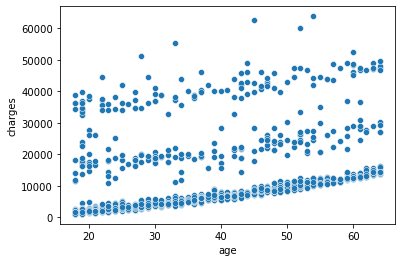

In [13]:
sns.scatterplot(x = 'age', y = 'charges', data = df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

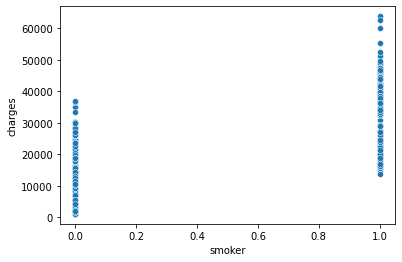

In [14]:
sns.scatterplot(x = 'smoker', y = 'charges', data = df)

In [15]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [16]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1.0
1,18,0,33.770,1,0,2.0
2,28,0,33.000,3,0,2.0
3,33,0,22.705,0,0,3.0
4,32,0,28.880,0,0,3.0


In [17]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

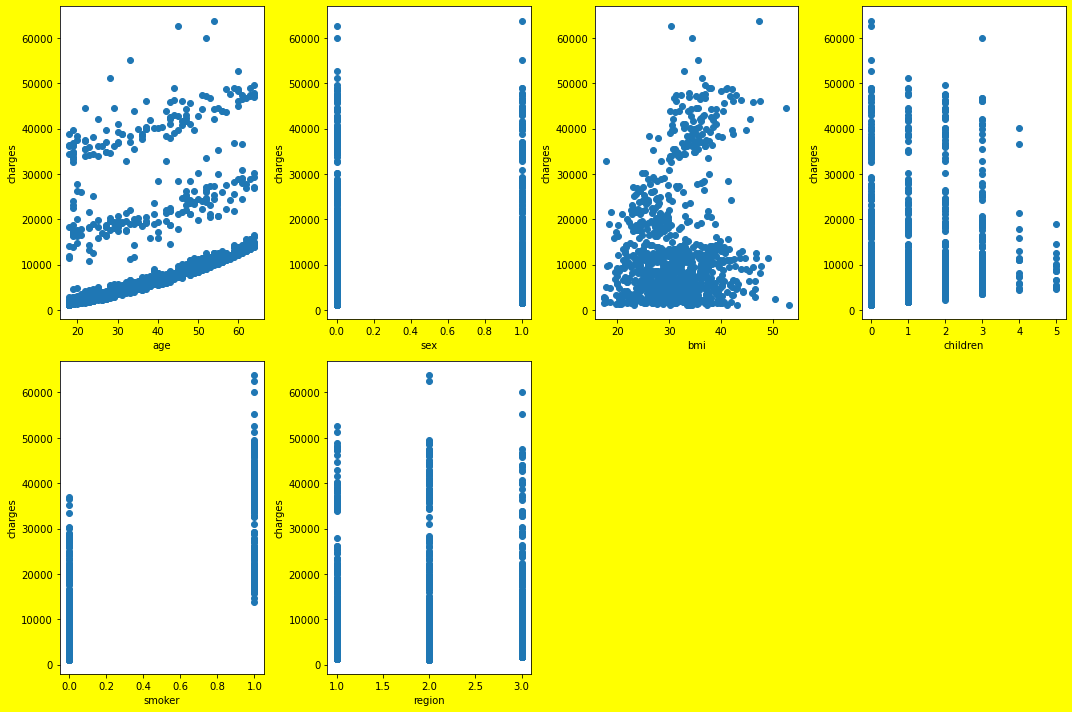

In [18]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber<=8: 
        ax = plt.subplot(2, 4, plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('charges', fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [19]:
#Train_Test_Split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [21]:
len(X_test)

406

In [22]:
len(X_train)

608

In [23]:
len(df)

1014

In [24]:
#import Linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [25]:
#Predict the model
prediction = lm.predict(X_test)

In [26]:
prediction[0:5]

array([ 1790.39761774,  8021.03634505, 24384.49364972, 10133.29578743,
       35444.47866008])

Text(0, 0.5, 'Predicted Y')

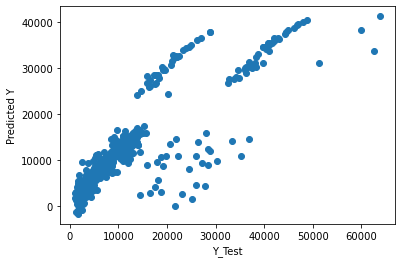

In [27]:
plt.scatter(y_test, prediction)
plt.xlabel('Y_Test')
plt.ylabel('Predicted Y')

In [30]:
# Predict cost for new customer : New_customer

data = {'age':45, 'sex':1, 'bmi':42.15, 'children':3, 'smoker':1, 'region':4}
index = [1]

In [31]:
new_customer = pd.DataFrame(data, index)
new_customer

,age,sex,bmi,children,smoker,region
1,45,1,42.15,3,1,4


In [32]:
prediction_cost = lm.predict(new_customer)
print("Medical insurance cost to new customer:", prediction_cost)

Medical insurance cost to new customer: [39146.61061892]
